In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("/Users/taramathur/Downloads/titanic/train.csv")
test_df=pd.read_csv("/Users/taramathur/Downloads/titanic/test.csv")

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  
The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

survival:   Survival
PassengerId: Unique Id of a passenger.
pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  # of siblings / spouses 
parch:  # of parents / children  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation



In [6]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goodwin, Master. Sidney Leonard",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


###

Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin

Data types for each feature: 
Survived: int
Pclass: int
Name: string
Sex: string
Age: float
SibSp: int
Parch: int
Ticket: string
Fare: float
Cabin: string
Embarked: string

Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. 
'Age' feature contains missing values

In [7]:
train_df.isnull().sum().sort_values(ascending=False)
per=round(train_df.isnull().sum()/train_df.isnull().count()*100,1).sort_values(ascending=False)
per

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


female survived:  74.0 %
male survived:  19.0 %


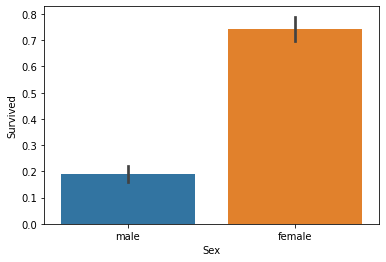

In [10]:
sns.barplot(x="Sex",y="Survived",data=train_df)
f_sur=round(train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
m_sur=round(train_df["Survived"][train_df["Sex"]=='male'].value_counts(normalize=True)[1]*100)
print("female survived: ",f_sur,"%")
print("male survived: ",m_sur,"%")      

Pclass1: 63.0 %
Pclass2: 47.0 %
Pclass3: 24.0 %


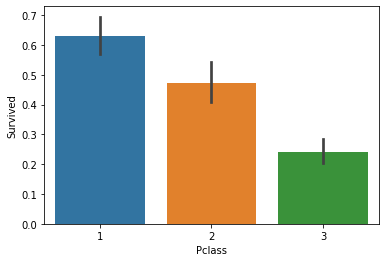

In [11]:
sns.barplot(x="Pclass",y="Survived",data=train_df)
pclass1=round(train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]*100)
pclass2=round(train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]*100)
pclass3=round(train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]*100)
print("Pclass1:" ,pclass1,"%")
print("Pclass2:" ,pclass2,"%")
print("Pclass3:" ,pclass3,"%")

SibSp 0: 34.5 %
SibSp 1: 53.6 %
SibSp 2: 46.4 %
SibSp 3: 25.0 %


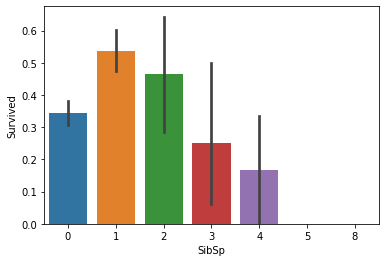

In [12]:
sns.barplot(x="SibSp",y="Survived",data=train_df)
SibSp0=round(train_df["Survived"][train_df["SibSp"]==0].value_counts(normalize=True)[1]*100,1)
SibSp1=round(train_df["Survived"][train_df["SibSp"]==1].value_counts(normalize=True)[1]*100,1)
SibSp2=round(train_df["Survived"][train_df["SibSp"]==2].value_counts(normalize=True)[1]*100,1)
SibSp3=round(train_df["Survived"][train_df["SibSp"]==3].value_counts(normalize=True)[1]*100,1)
print("SibSp 0:" ,SibSp0,"%")
print("SibSp 1:" ,SibSp1,"%")
print("SibSp 2:" ,SibSp2,"%")
print("SibSp 3:" ,SibSp3,"%")

Parch 0: 34.4 %
Parch 1: 55.1 %
Parch 2: 50.0 %
Parch 3: 60.0 %
Parch 5: 20.0 %


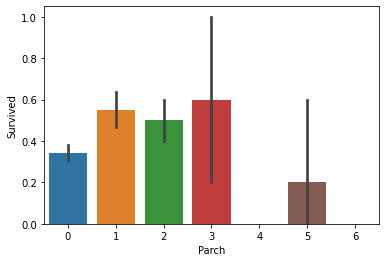

In [13]:
sns.barplot(x="Parch",y="Survived",data=train_df)
Parch0=round(train_df["Survived"][train_df["Parch"]==0].value_counts(normalize=True)[1]*100,1)
Parch1=round(train_df["Survived"][train_df["Parch"]==1].value_counts(normalize=True)[1]*100,1)
Parch2=round(train_df["Survived"][train_df["Parch"]==2].value_counts(normalize=True)[1]*100,1)
Parch3=round(train_df["Survived"][train_df["Parch"]==3].value_counts(normalize=True)[1]*100,1)
Parch5=round(train_df["Survived"][train_df["Parch"]==5].value_counts(normalize=True)[1]*100,1)
print("Parch 0:" ,Parch0,"%")
print("Parch 1:" ,Parch1,"%")
print("Parch 2:" ,Parch2,"%")
print("Parch 3:" ,Parch3,"%")
print("Parch 5:" ,Parch5,"%")


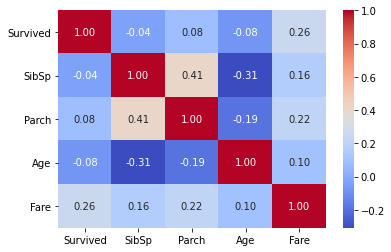

In [14]:
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [15]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


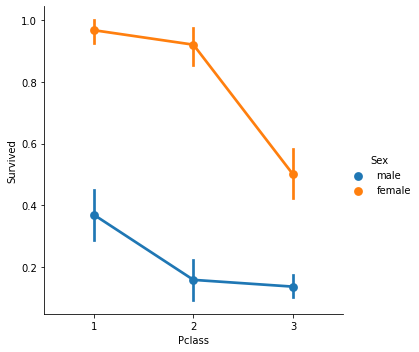

In [17]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)

In [18]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

NameError: name 'dataset' is not defined

### Handling missing data

In [19]:
train_df = train_df.fillna({"Embarked": "S"})

In [20]:
train_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

In [21]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df.isnull().sum().sort_values(ascending=False)


Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [22]:
drop_column = ['PassengerId','Cabin', 'Ticket']
train_df.drop(drop_column, axis=1, inplace = True)

In [23]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
train_df['FamilySize'] = train_df ['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
train_df['AgeBin'] = pd.cut(train_df['Age'].astype(int), 5)

In [26]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,"(14.454, 31.0]","(16.0, 32.0]"


In [27]:
train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [28]:
stat_min = 10 
title_names = (train_df['Title'].value_counts() < stat_min)
train_df['Title'] = train_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [30]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Col              True
Major            True
Ms               True
Don              True
Mme              True
Sir              True
the Countess     True
Capt             True
Lady             True
Jonkheer         True
Name: Title, dtype: bool

In [29]:
train_df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Title
868,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,9.500,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.600,C,2,0,"(31.0, 512.329]","(32.0, 48.0]",Misc
173,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,7.925,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr
530,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26.000,S,3,0,"(14.454, 31.0]","(-0.08, 16.0]",Miss
487,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.700,C,1,1,"(14.454, 31.0]","(48.0, 64.0]",Mr
